<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/labs/lab_72_tomas_ausensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1hG9C4e6Tisw2VTEatGkP_hRmnZNpbXK4" width = "300" align="center"/>


El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento.

* Se solicita ajustar al menos tres modelos de clasificación:
     * Regresión logística
     * K-Nearest Neighbours
     * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_.
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

# Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
#Sklearn
from sklearn.pipeline import make_pipeline, make_union
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import auc, roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_validate

In [3]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [6]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Se le puede dar un vistazo a la distribución de los datos mediante histogramas:

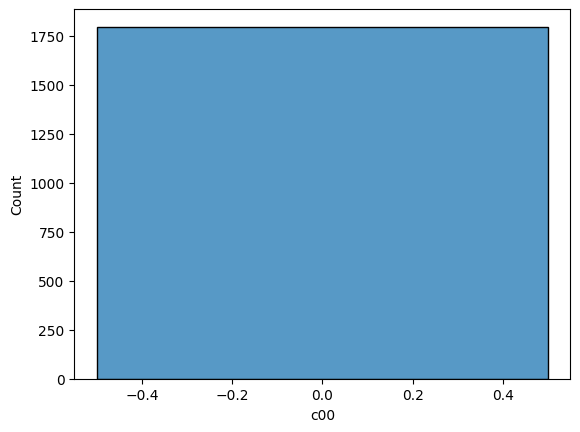

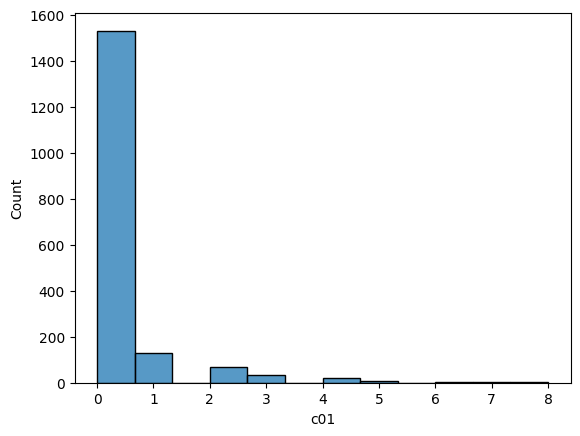

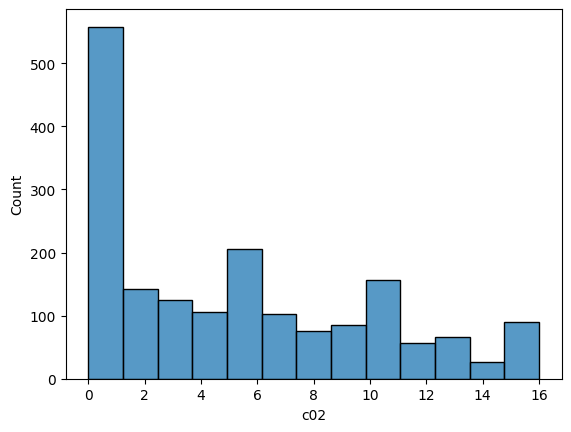

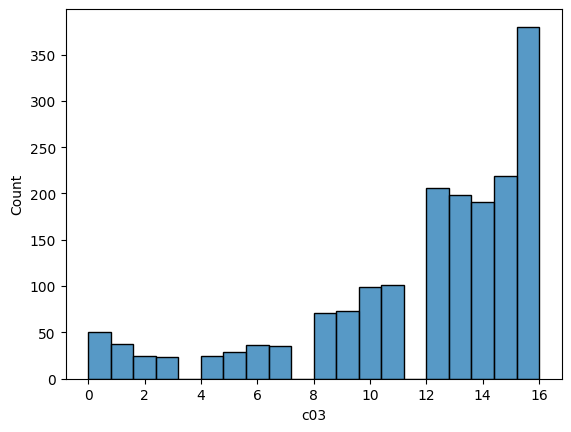

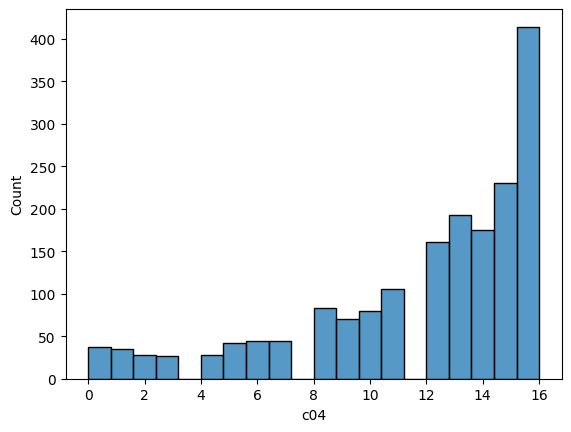

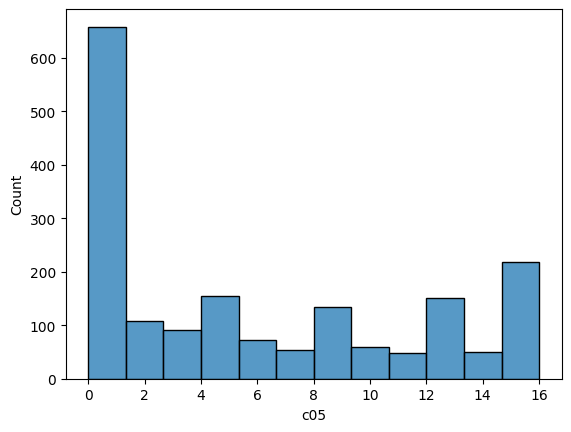

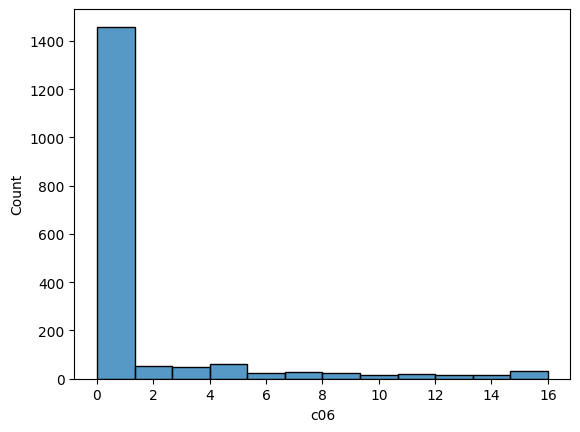

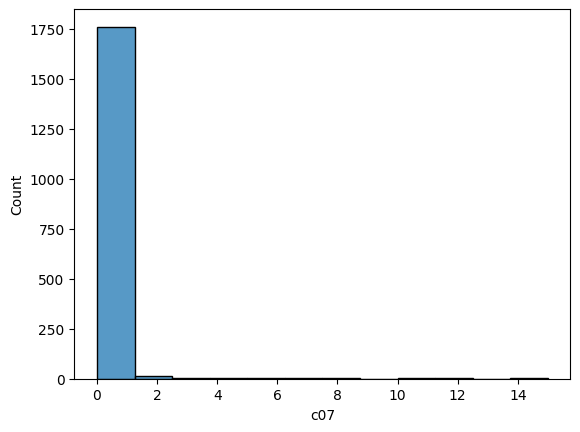

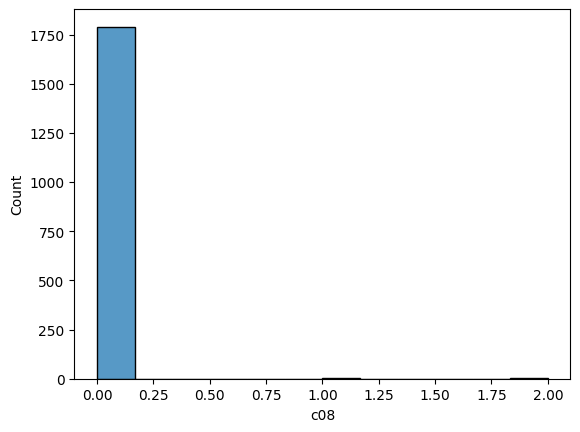

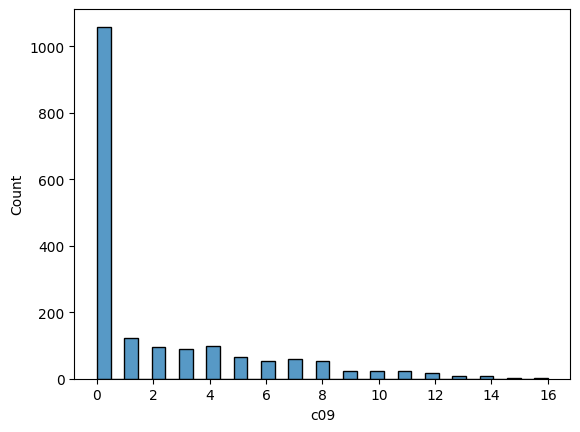

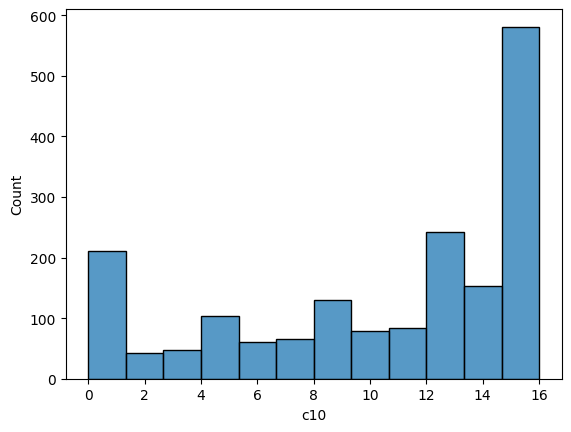

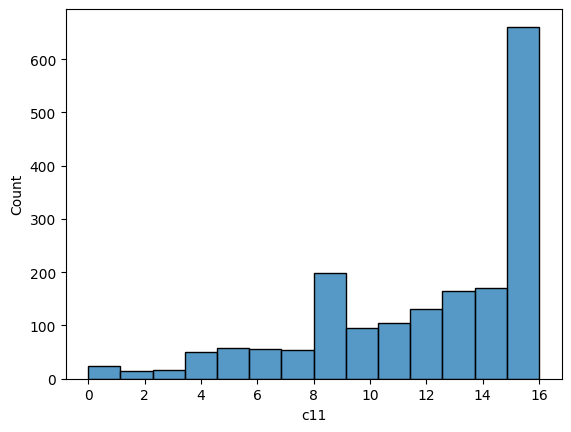

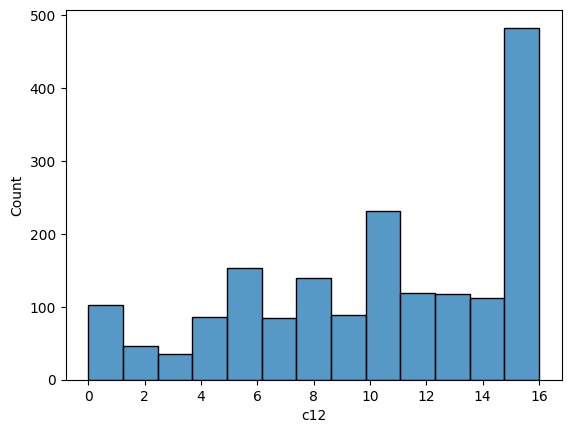

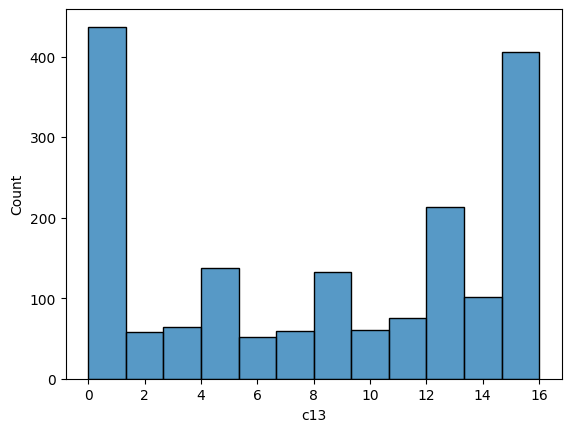

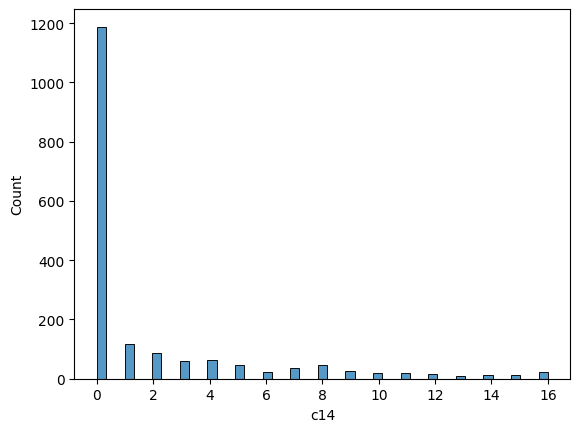

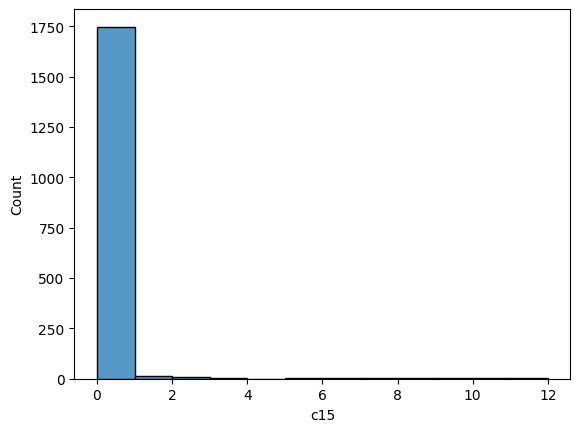

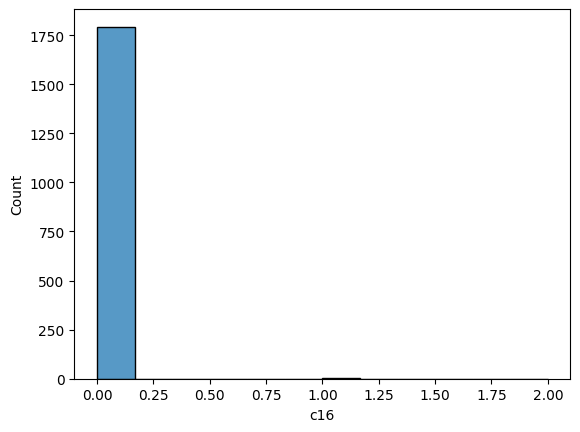

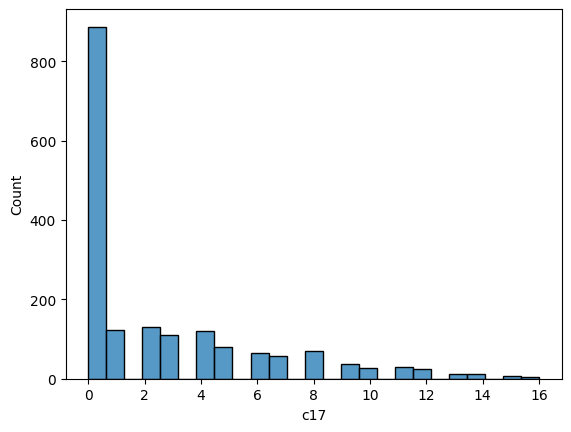

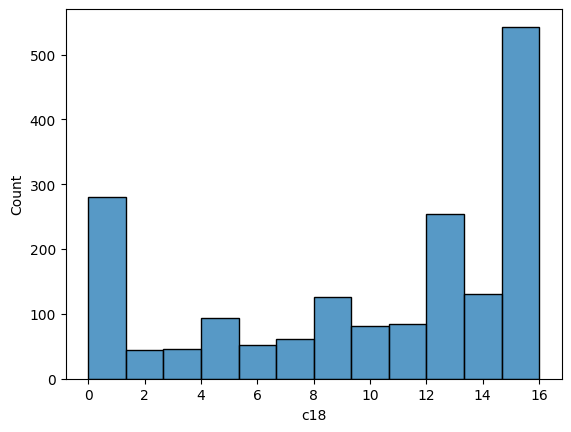

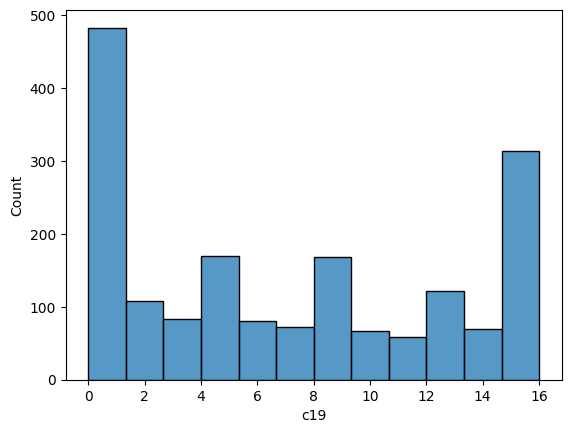

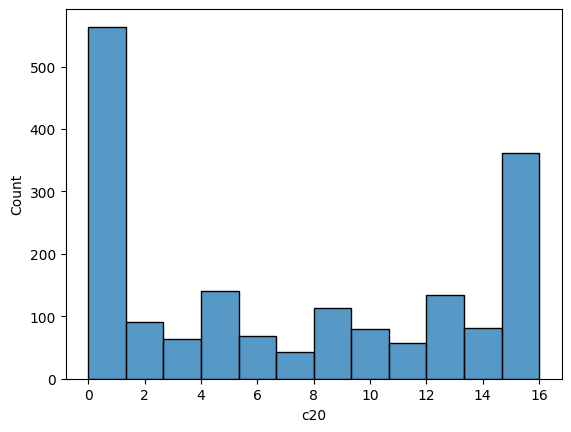

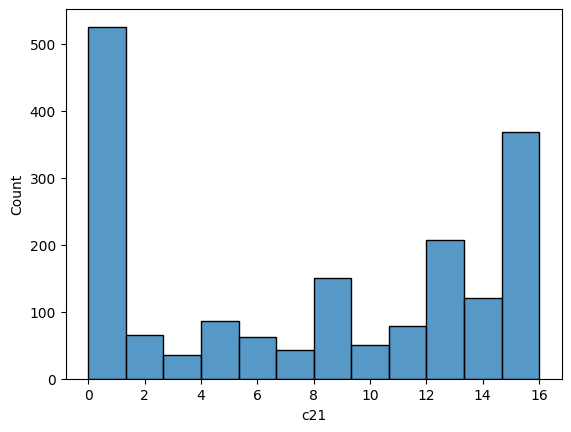

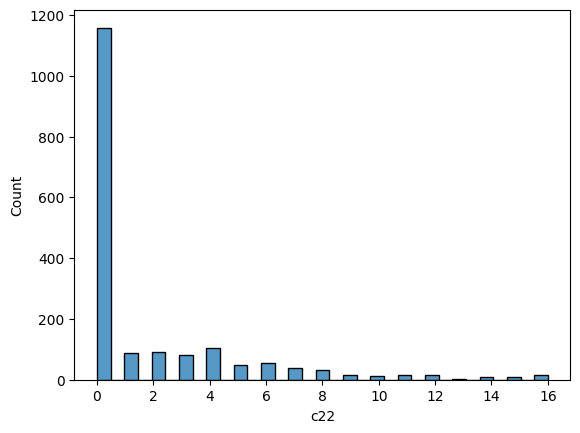

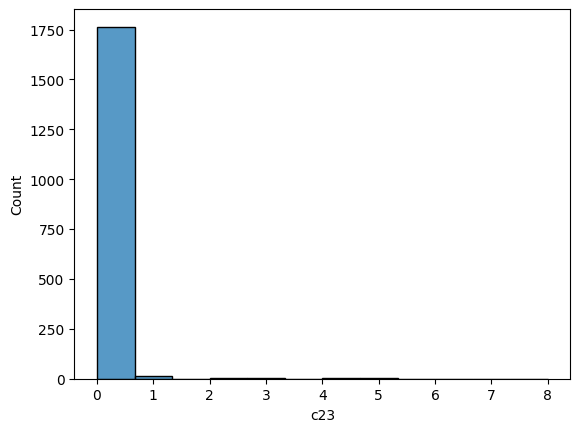

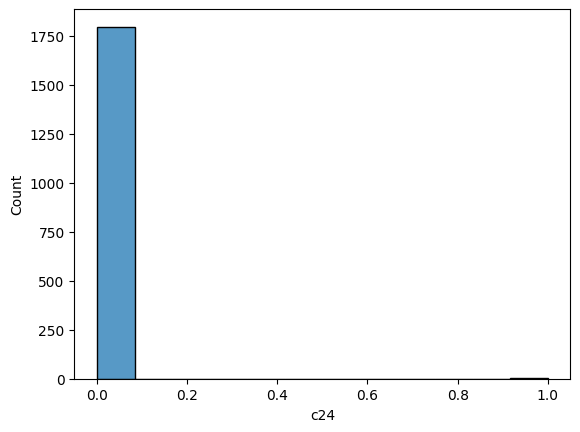

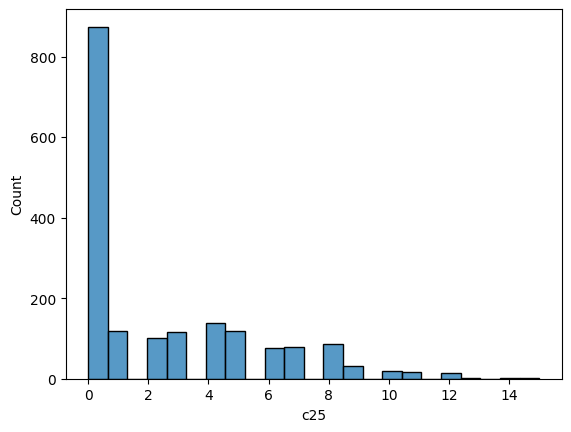

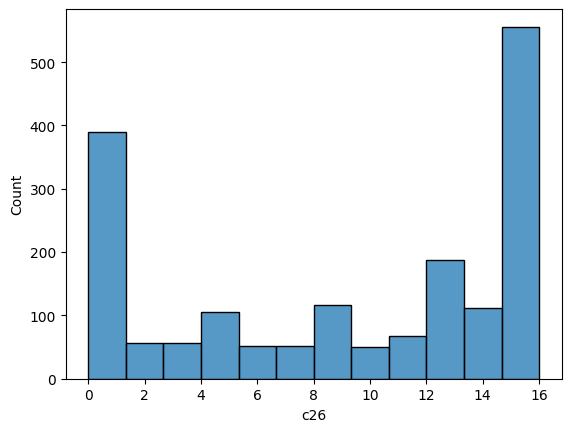

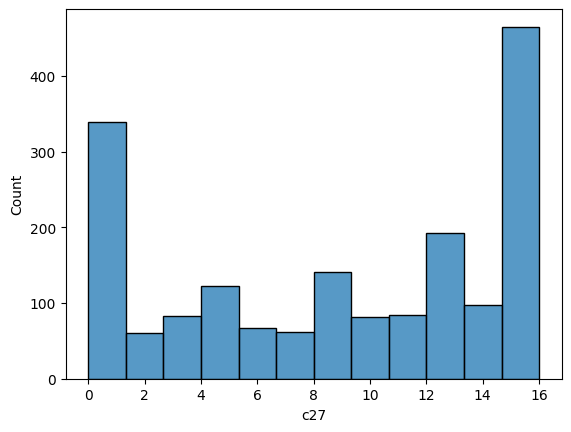

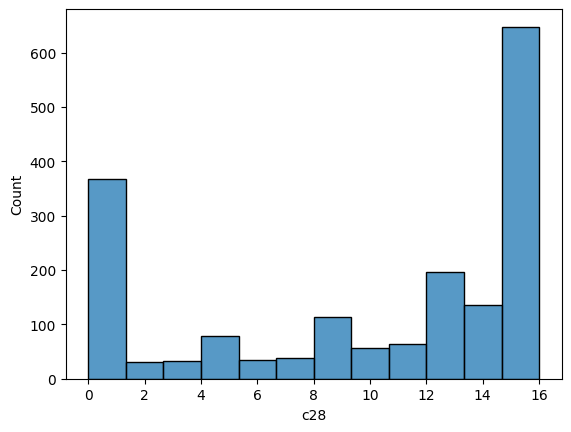

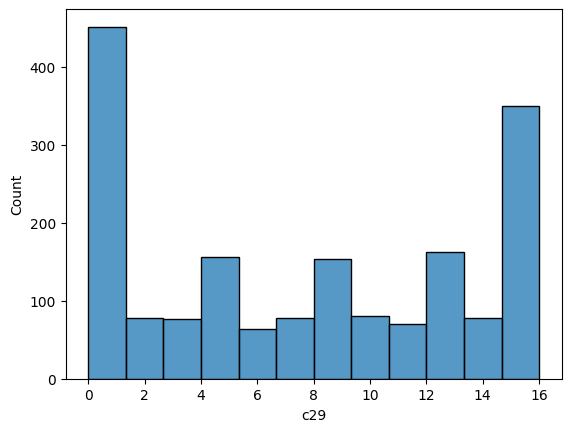

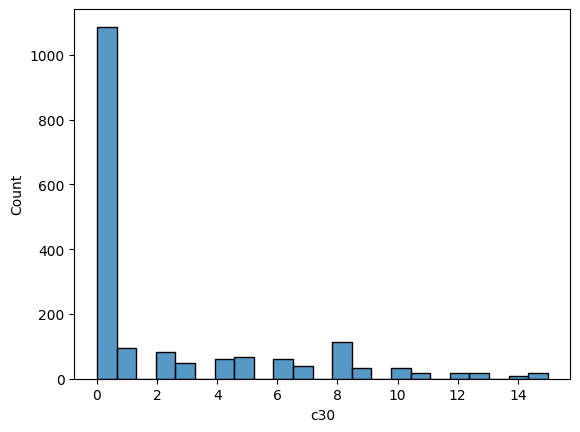

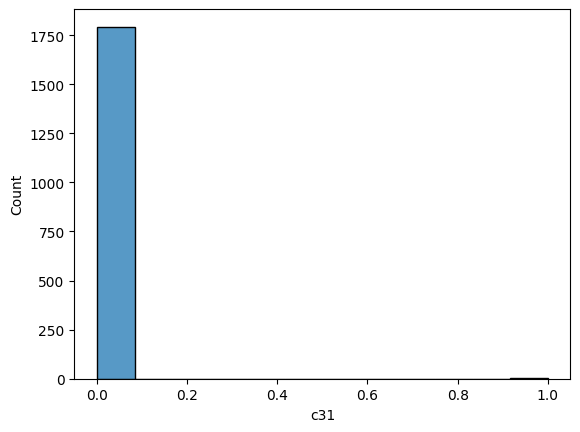

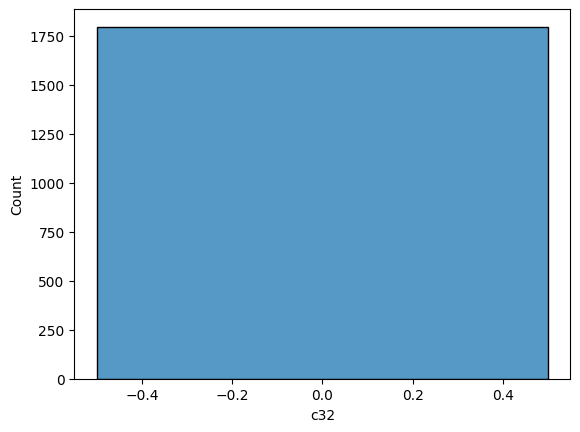

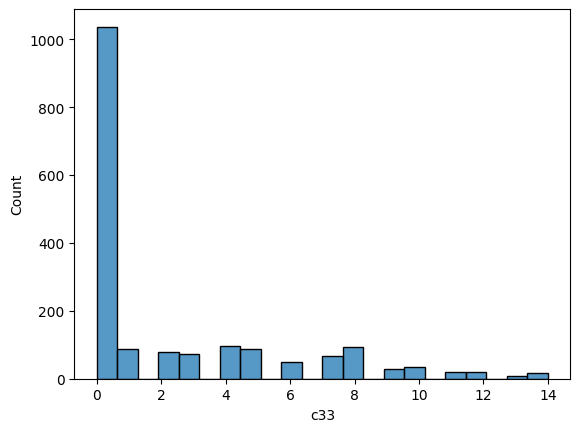

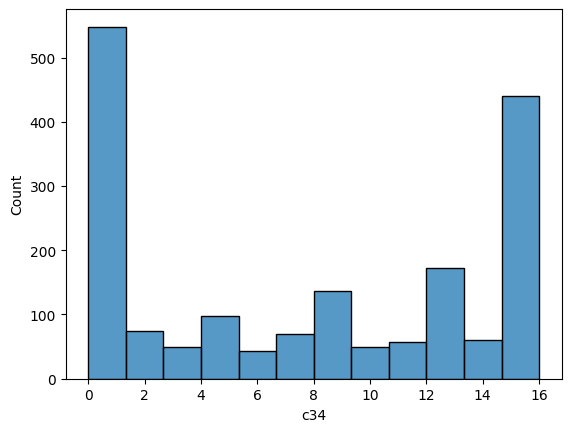

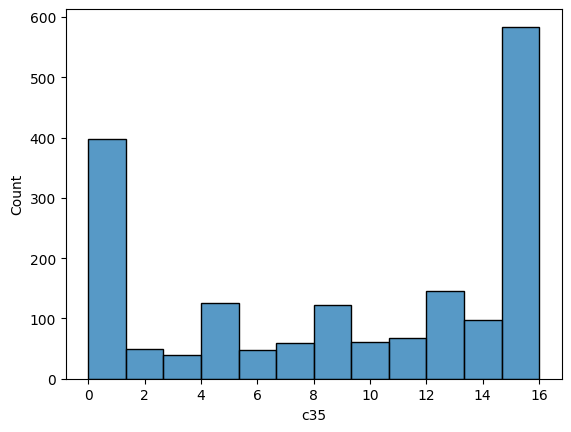

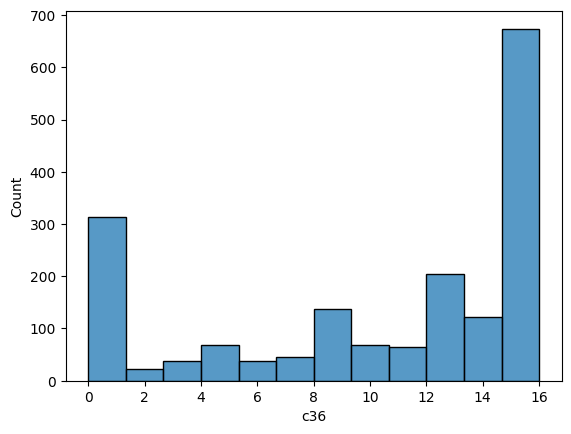

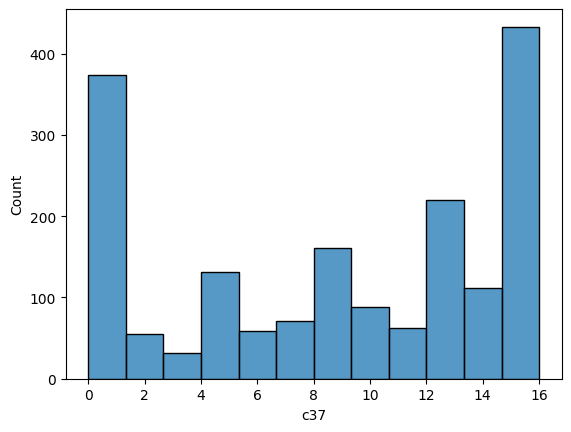

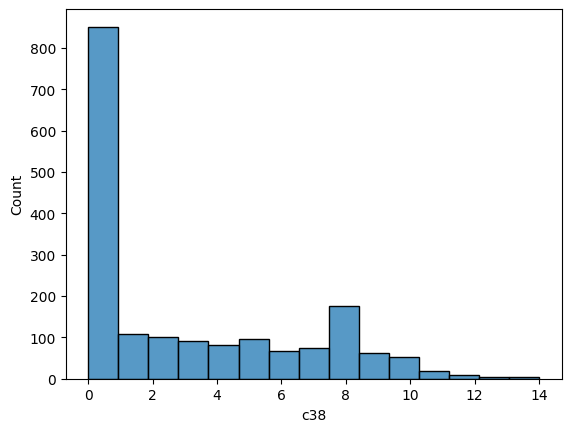

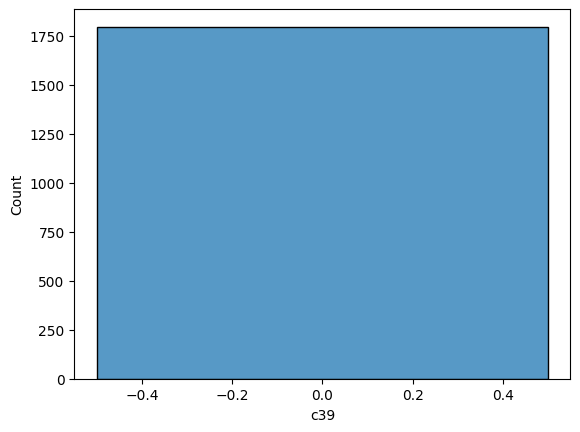

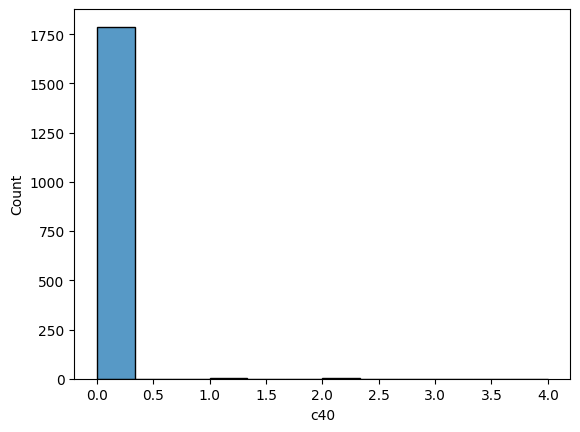

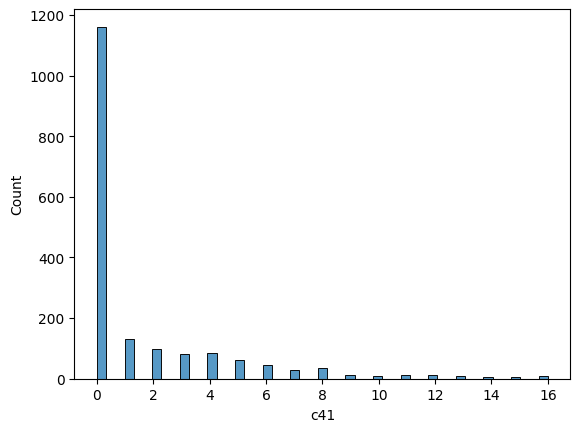

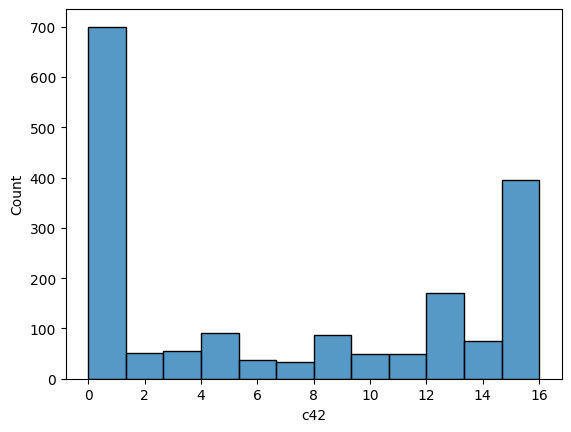

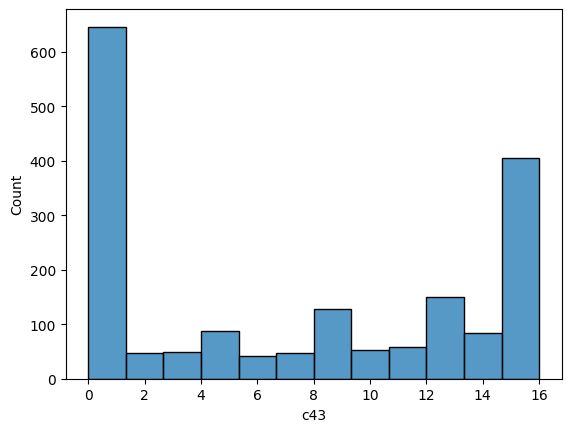

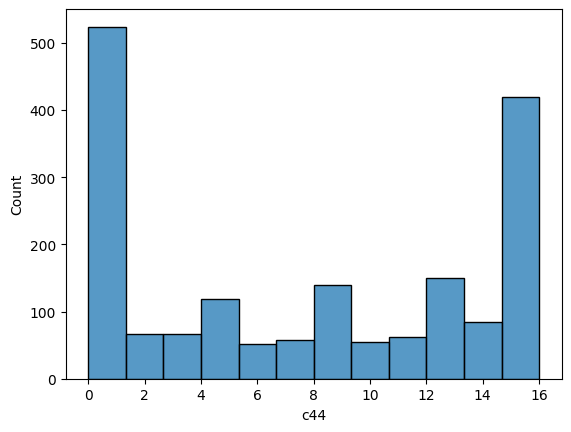

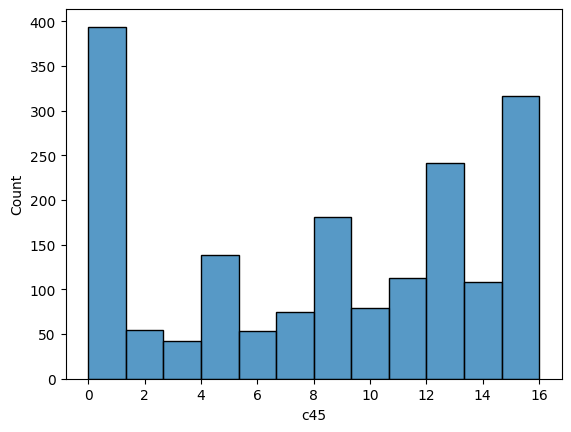

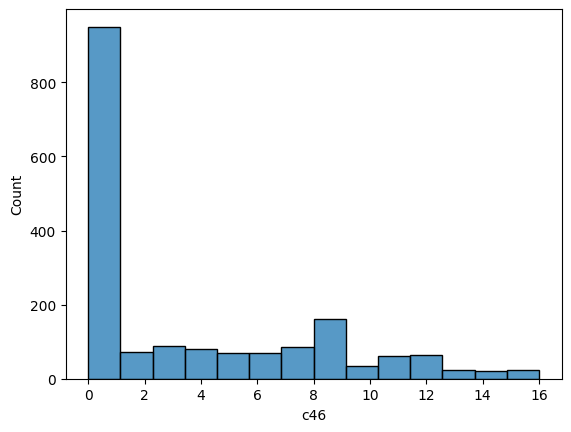

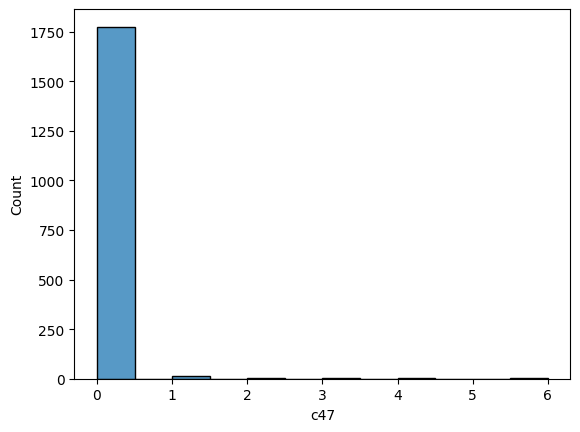

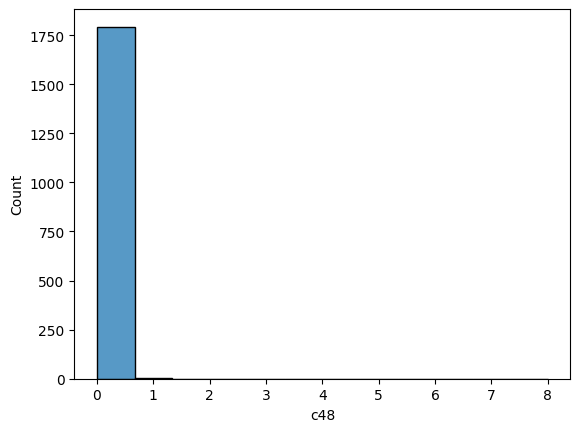

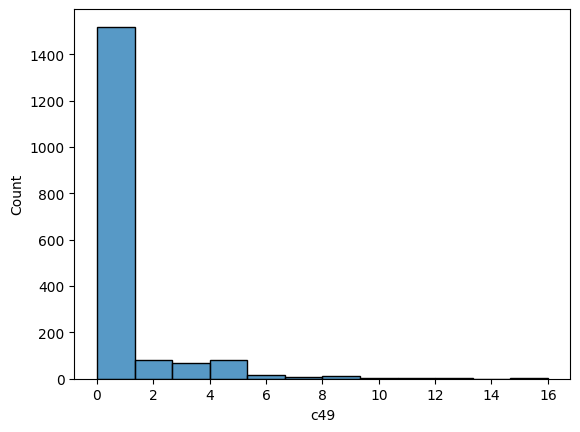

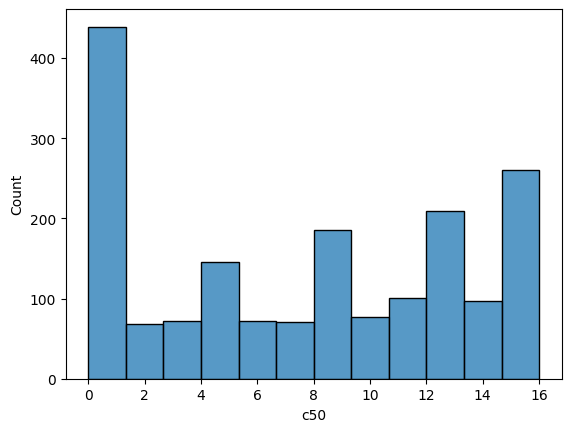

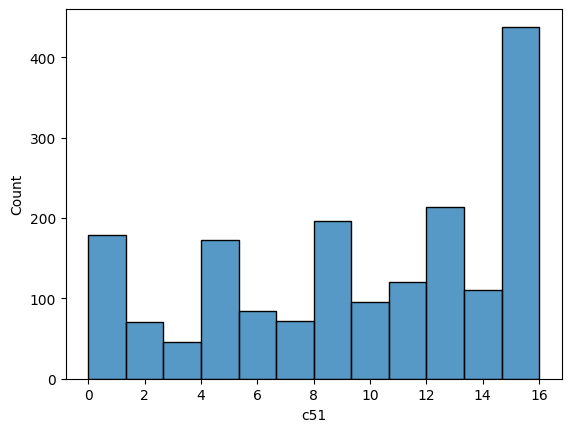

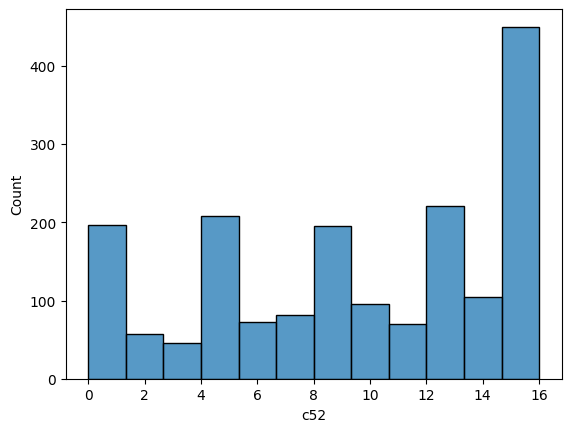

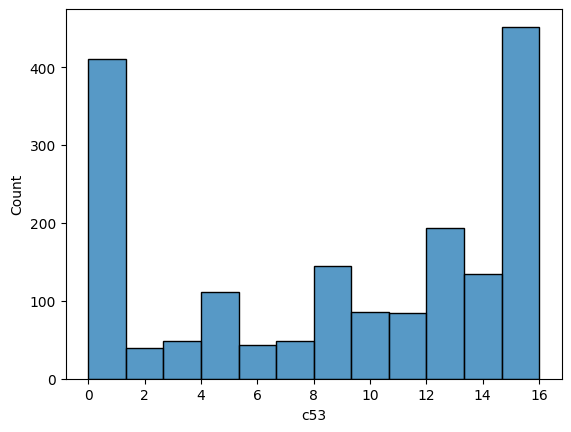

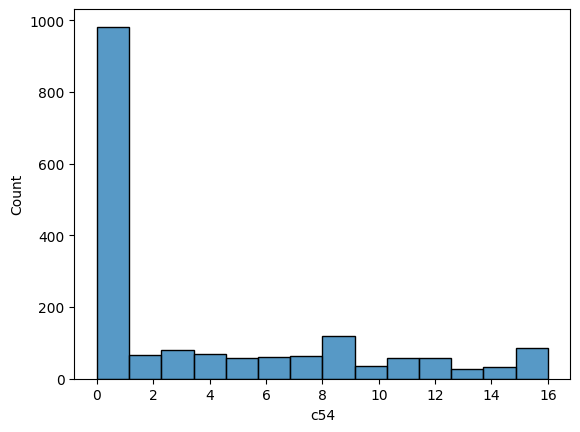

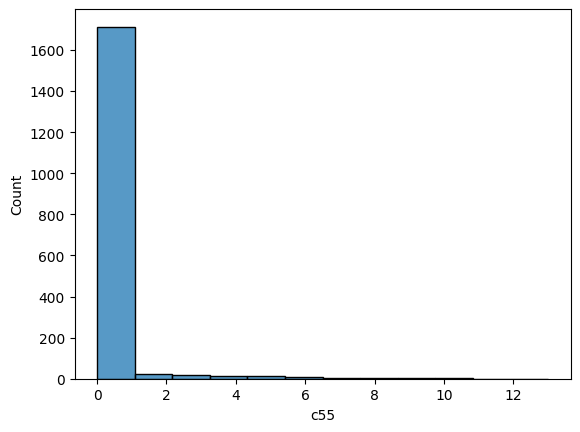

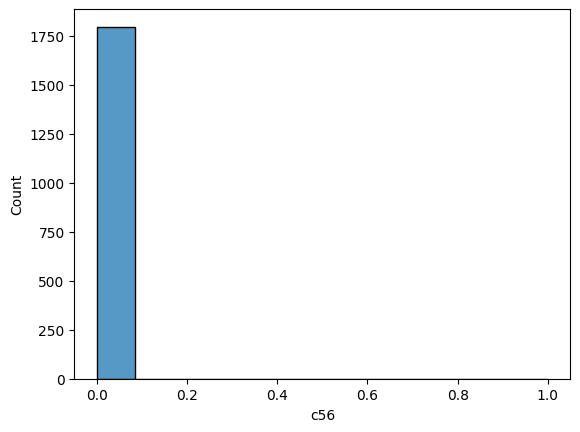

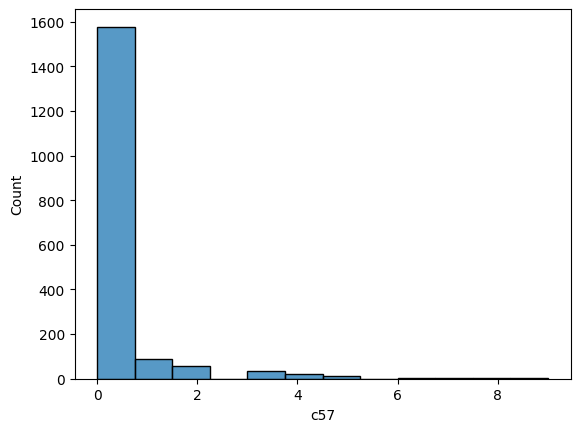

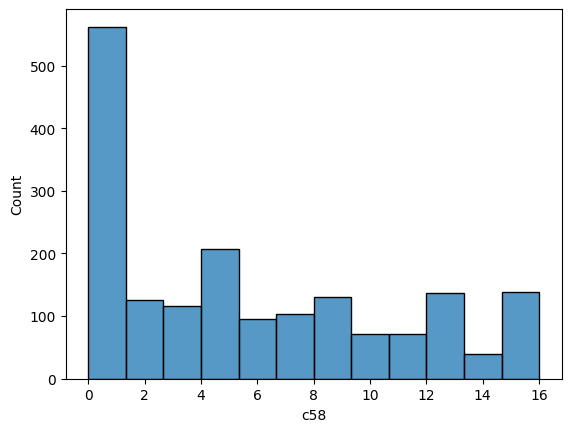

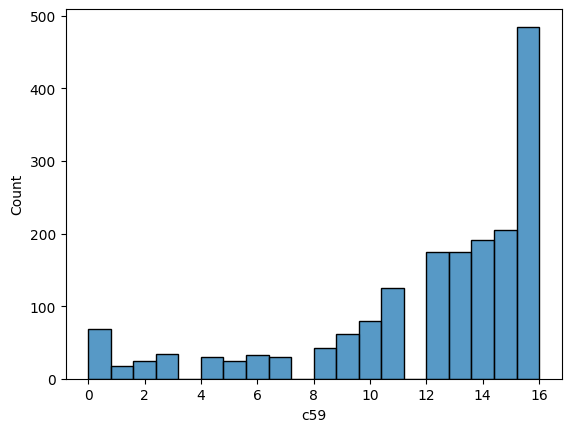

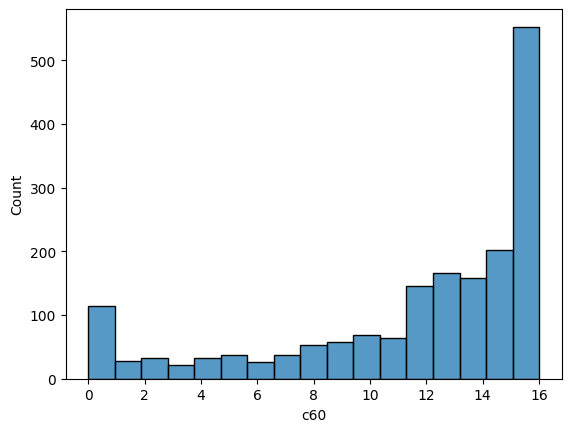

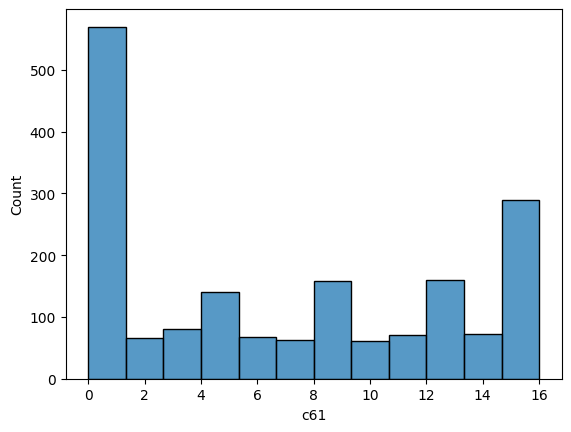

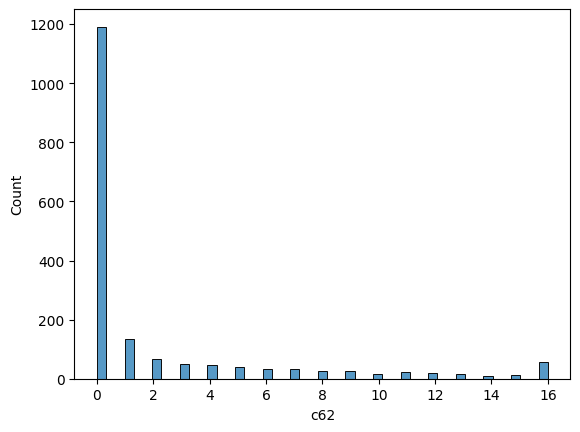

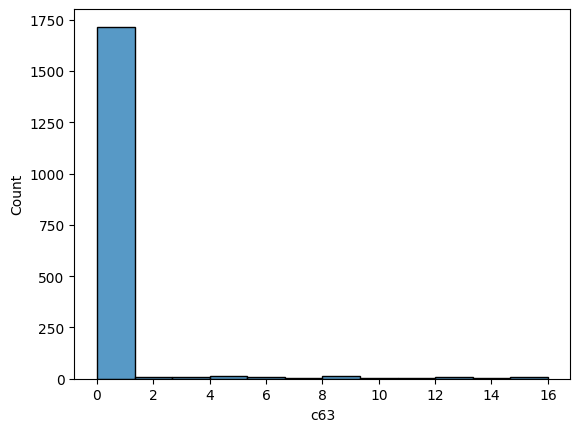

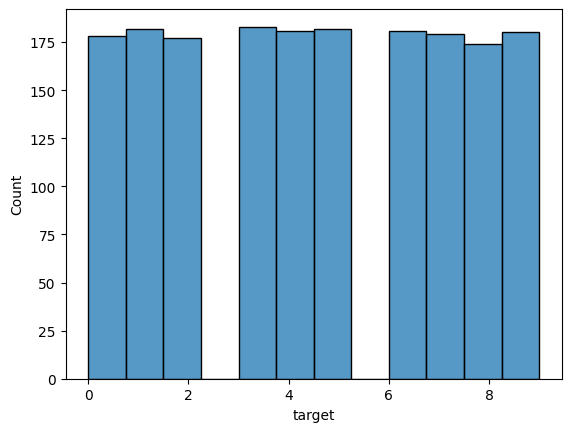

In [7]:
for col in digits.columns:
  sns.histplot(
      data = digits,
      x = col
  )
  plt.show()

Ahora, algunos histogramas se *degeneran*, en el sentido que el gráfico muestra valores en el eje x que no corresponden a los verdaderos. Ello significa que solamente hay un valor en aquella columna, especificamente, solo 0's.

In [8]:
mask = digits.apply(lambda col : col.nunique() == 1)

filtered_digits = digits.loc[:, mask]
filtered_digits.columns

Index(['c00', 'c32', 'c39'], dtype='object')

In [9]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

Con `digits.info()` se pueden contestar varias preguntas:
- La cantidad de espacio reservada para los datos
- El tipo de dato para cada columna, lo cual es información valiosa para el preprocesamiento y la estrategia a seguir
- Si hay datos nulos o no. En este caso, aunque la cantidad de columnas es considerable, es posible dar un vistazo rápido. Otra opción es filtrar por columnas con algún valor nulo usando `.isnull().any()`

In [10]:
nan_cols = [col for col in digits.columns if digits[col].isnull().any()]
nan_cols

[]

Para la cantidad de datos que hay en cada clase:

In [11]:
digits['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

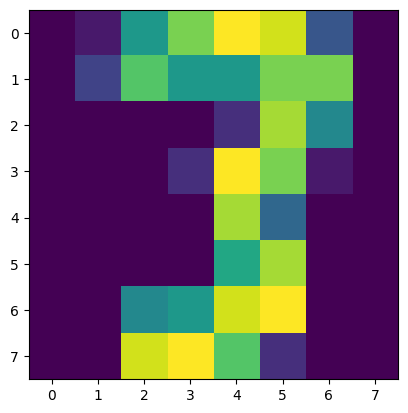

In [13]:
plt.imshow(X = digits_dict["images"][23])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

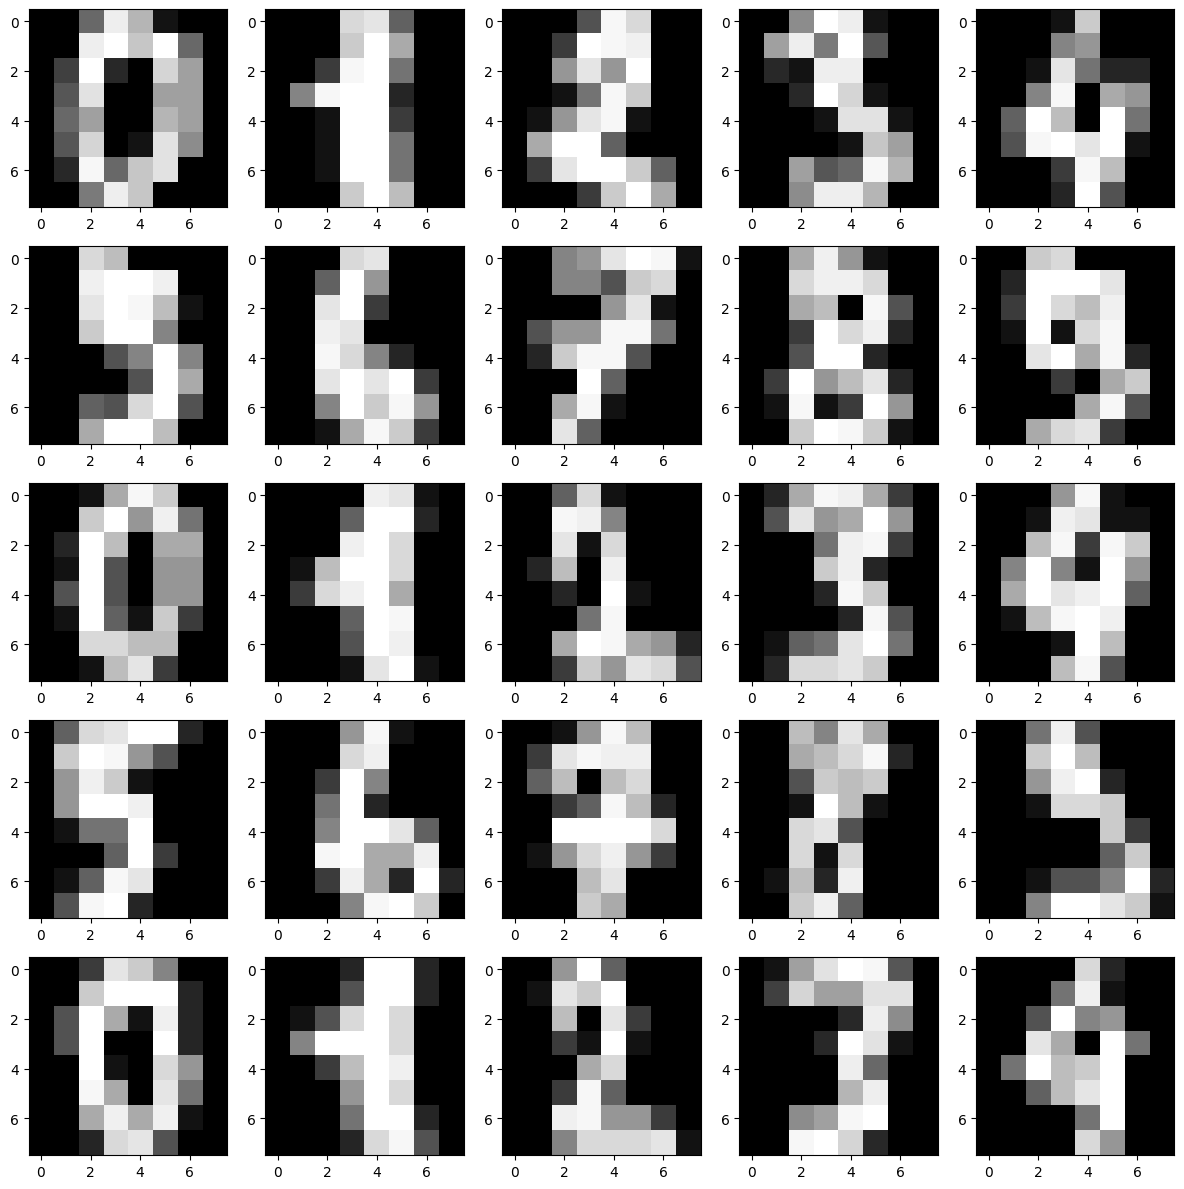

In [14]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for idx in range(0,25):
  axs[idx // 5, idx % 5].imshow(X = digits_dict["images"][idx], cmap='Greys_r')
fig.tight_layout()
## FIXME

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


#### train_test_split

In [15]:
# features, target
X = digits.drop(columns="target")
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Para el largo del train y test set:

In [16]:
print("Largo del train set: {}\nLargo del test set: {}".format(len(X_train), len(X_test)))

Largo del train set: 1437
Largo del test set: 360


#### Modelos
Los modelos seleccionados son:
- KNN
- Regresor Logístico
- Perceptron

Las métricas seleccionadas son:
- Accuracy
- Precision
- Recall
- f-score

como el problema es *multiclase*, la extensión utilizada será OVR (one-versus-rest)


In [17]:
#target names para ser utilizado en el classification report
unique_labels = digits['target'].unique()
target_names = list(unique_labels)
target_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### Entrenamiento de modelos

In [18]:
models = [
    ('LogisticRegression', OneVsRestClassifier(LogisticRegression(solver = 'sag', max_iter = 1000)).fit(X_train.values, y_train.values)),
    ('KNN', OneVsRestClassifier(KNeighborsClassifier()).fit(X_train.values, y_train.values)),
    ('Perceptron', OneVsRestClassifier(Perceptron()).fit(X_train.values, y_train.values))
]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Métricas para cada clase, para cada modelo

In [19]:
#Se instancia un dataframe para guardar los datos
metrics_df = pd.DataFrame()

for model_name, model in models:
  #class_data es la lista que contiene los resultados de las métricas de cada
  #clase para cada modelo
  class_data = []

  report = classification_report(y_test.values, model.predict(X_test.values), target_names = target_names, output_dict = True )
  for label, metrics in report.items():
    #De manera genérica, classification report entrega un accuracy global, no de cada clase
    if label != 'accuracy':
       class_data.append({'Model': model_name, 'Class': label, 'Precision': metrics['precision'],
                                            'Recall': metrics['recall'], 'F1-Score': metrics['f1-score'],
                                            'Support': metrics['support']})

  #Se guardan los resultados en un dataframe temporal y se concatena a metrics_df
  temp_df = pd.DataFrame(class_data)
  metrics_df = pd.concat([metrics_df, temp_df], axis = 0)

In [20]:
metrics_df

,Model,Class,Precision,Recall,F1-Score,Support
0,LogisticRegression,0,1.000000,1.000000,1.000000,33
1,LogisticRegression,1,0.931034,0.964286,0.947368,28
2,LogisticRegression,2,0.970588,1.000000,0.985075,33
3,LogisticRegression,3,1.000000,0.970588,0.985075,34
4,LogisticRegression,4,1.000000,0.956522,0.977778,46
5,LogisticRegression,5,0.937500,0.957447,0.947368,47
6,LogisticRegression,6,0.944444,0.971429,0.957746,35
7,LogisticRegression,7,1.000000,0.970588,0.985075,34
8,LogisticRegression,8,0.848485,0.933333,0.888889,30
9,LogisticRegression,9,0.972973,0.900000,0.935065,40


#### Matrices de confusión

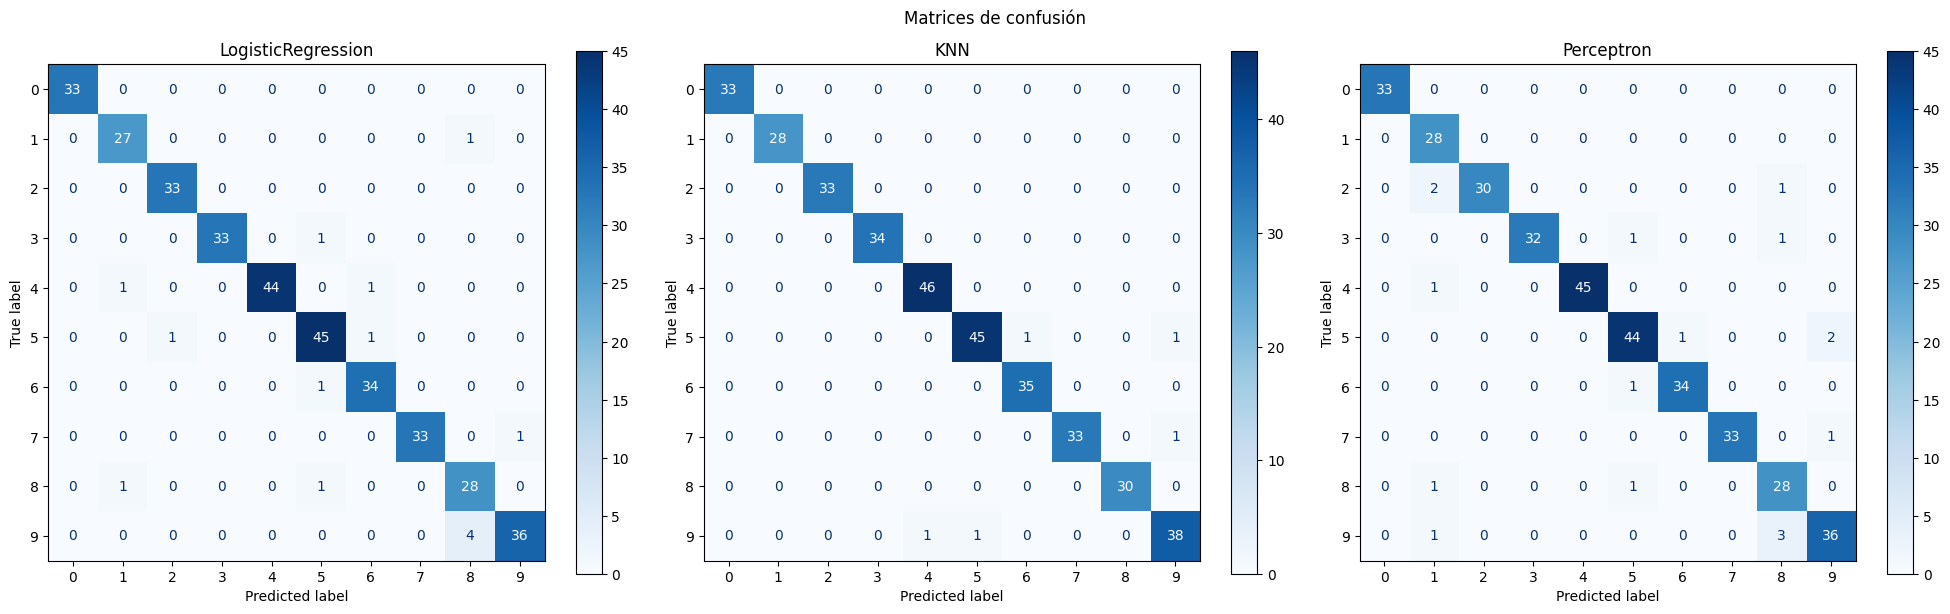

In [21]:
fig, axes = plt.subplots(figsize=(20,6), nrows = 1, ncols = 3)
i = 0
for model_name, model in models:
  cm = confusion_matrix(y_test.values, model.predict(X_test.values), labels=model.classes_)

  axes[i].set_title(model_name)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(cmap = "Blues", ax = axes[i])
  i = i+1
plt.suptitle('Matrices de confusión')
plt.tight_layout()
plt.show()


De los resultados, se puede concluir que:
- El mejor modelo, en cuanto a las métricas, es KNN. Se puede apreciar en el macro average, que condensa la información de las métricas de cada clase. Ahora, también es el modelo que más demora en ajustarse, debido a su complejidad. El regresor logístico y el perceptrón son modelos bastante sencillos en comparación con KNN. Sin embargo, la ganancia que se obtiene en métricas compensa ese tiempo de ajuste extra.
-Debido a lo anterior, el modelo escogido es KNN

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo encontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

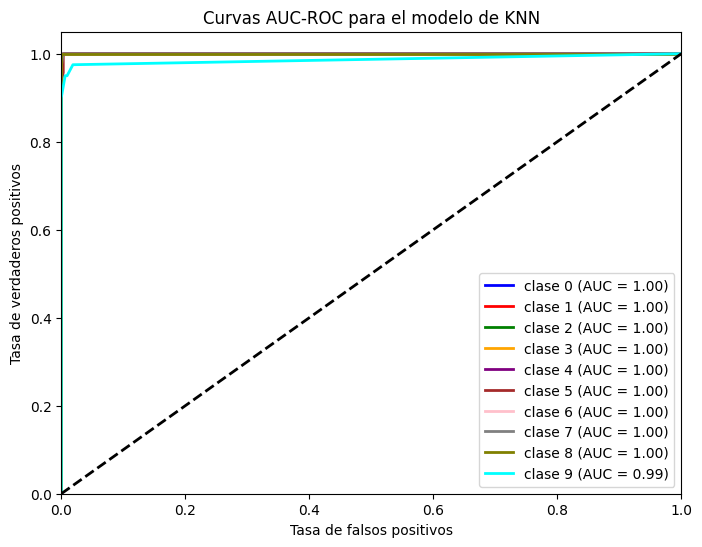

In [22]:
y_pred_proba = models[1][1].predict_proba(X_test.values)

n_classes = len(models[1][1].classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test.values, y_pred_proba[:, i], pos_label = i)
  roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize = (8,6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], color = colors[i], lw = 2, label = f'clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], color = 'black', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas AUC-ROC para el modelo de KNN')
plt.legend(loc= 'lower right')
plt.show()

Es posible concluir lo que se puede observar en los resultados para KNN de `metrics_df`: KNN logra tener una buena predicción sobre la mayoría de las clases. Por otro lado, logra tener una buena separación entre los falsos positivos y los verdaderos positivos

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [23]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

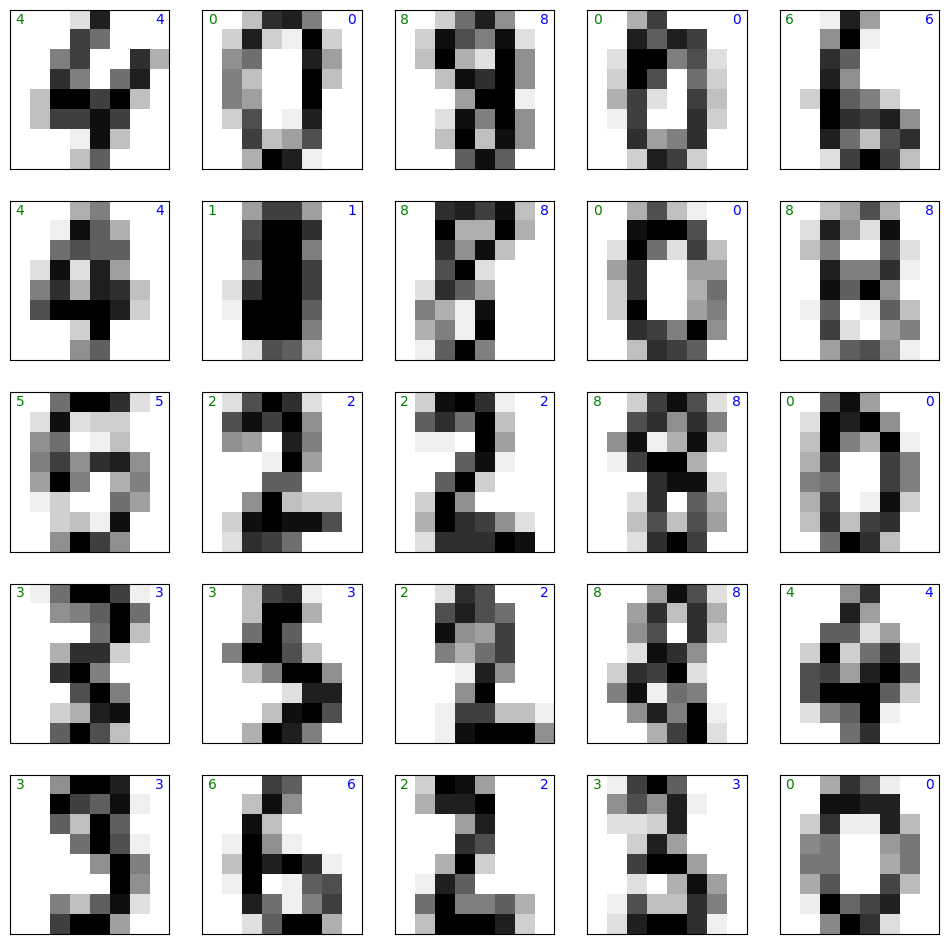

In [24]:
mostrar_resultados(digits, KNeighborsClassifier())

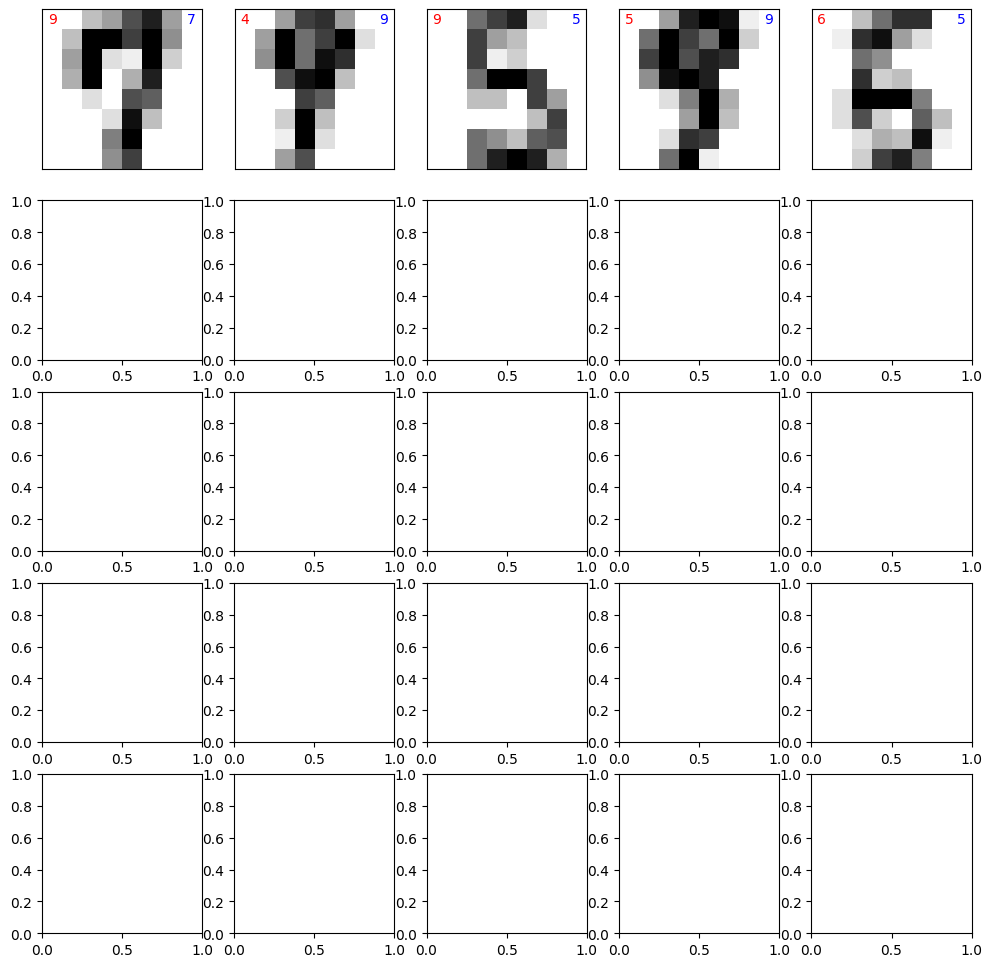

In [25]:
mostrar_resultados(digits, KNeighborsClassifier(), label = 'incorrectos')

En el caso de KNN, diría que las fallas pueden deberse a:
- Falta de datos de entrenamiento: contamos con 1437 ejemplos. A medida que contemos con más ejemplos, mejoramos la calidad del modelo y su poder predictivo
- El propio modelo: Puede que sea adecuado entrenar hiperparámetros para mejorar su habilidad predictiva, o incluso comparar con más modelos
- La naturaleza *particular* de cada dato: puede que los datos donde se haya equivocado al modelo sean *raros* en un sentido estadístico. Dicho de otra forma, puede que sean datos que combinen características de varias clases, lo que dificulte su clasificación.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Una conclusión importante, a mí parecer, es que la naturaleza de los datos permite que modelos sencillos como el perceptrón y el regresor lineal funcionen bastante bien en la tarea de clasificación, debido a los resultados obtenidos. Esta *buena separación* de los datos es una pista de la estructura que conforman en el espacio adecuado en el cual los podemos insertar.

Lo anterior puede ser el puntapie inicial para iniciar un proceso más exhaustivo en la búsqueda de caracteristicas explotables para obtener modelos más precisos en la tarea de clasificación.

Por otro lado, más posibilidades de profundización abarcan el uso de hiperparámetros en los modelos, lo que conlleva a un proceso extra con el uso de `GridSearch` para hallar el valor adecuado de los hiperparámetros. Otra idea es utilizar **validación cruzada** para robustecer la selección de modelos.

Otra acotación importante del problema es ver la posibilidad de reducir atributos. En mi primera observación (y, posiblemente, ignorancia), diría que no es adecuado, pues las 64 columnas codifican toda la información de una imagen de 8x8, es decir, no encuentro que haya información redundante, a primera vista. Puede ser, sin embargo, que algunas columnas, como píxeles de los límites de la imagen, específicamente, límite izquierdo y derecho, puedan ser redundantes, ya que siempre codifican espacios en blanco. Habría que estudiar más a fondo el caso.